### This document is used to test SVD

In [93]:
a = rand(2,2)

2×2 Array{Float64,2}:
 0.643562  0.784696
 0.226831  0.462461

In [6]:
F = svdfact(a)
print(F[:U],F[:S],F[:Vt])

[-0.696899 -0.71717; -0.71717 0.696899][1.35055, 0.259002][-0.965579 -0.260108; 0.260108 -0.965579]

In [7]:
F[:U]

2×2 Array{Float64,2}:
 -0.696899  -0.71717 
 -0.71717    0.696899

In [68]:
function b_svd(N)
    elapsed_time = zeros(Float64,N)
    for i = 1:N
        a = rand(i,i)
        stuff =  @timed F = svdfact(a)
        elapsed_time[i] = stuff[2]
    end
    elapsed_time
end

b_svd (generic function with 1 method)

In [71]:
e_time = b_svd(2000)
sum(e_time)

126.10159081799998

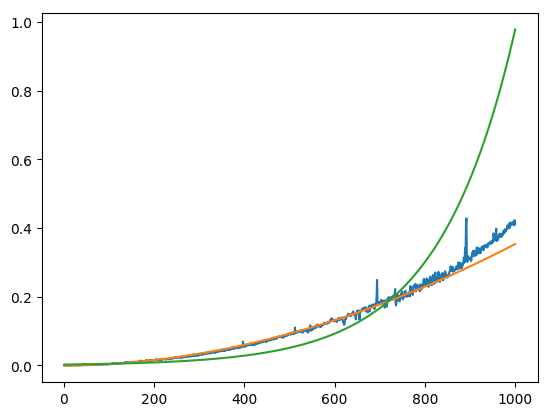

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] log(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at .\deprecated.jl:57
 [3] power_fit(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Array{Float64,1}) at C:\Users\User\AppData\Local\JuliaPro-0.6.2.1\pkgs-0.6.2.1\v0.6\CurveFit\src\linfit.jl:13
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\Users\User\AppData\Local\JuliaPro-0.6.2.1\pkgs-0.6.2.1\v0.6\Compat\src\Compat.jl:174
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\User\AppData\Local\JuliaPro-0.6.2.1\pkgs-0.6.2.1\v0.6\IJulia\src\execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at C:\Users\User\AppData\Local\JuliaPro-0.6.2.1\pkgs-0.6.2.1\v0.6\IJulia\src\eventloop.jl:8
 [8] (::IJulia.##14#17)() at .\task.jl:335
while loading In[91], in expression star

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000023CB9DA0>

In [91]:
using CurveFit
poly(x,a,C) = C*x^a
x = linspace(1,2000,2000)
pfit = power_fit(x,e_time)
poly_curve = fit[1]*x.^fit[2]
efit = exp_fit(x,e_time)
exp_curve = efit[1]*exp(efit[2].*x)

plot(x,e_time)
plot(x,poly_curve)
plot(x,exp_curve)

In [92]:
pfit[2]

1.9338519899622753